In [1]:
import sys
import os
sys.path.append(os.getcwd())
# sys.path.append(r"D:\workspace\SPECT_project\RadiSmart")
# sys.path.append(r"/home/liusheng/worksapce2024/Projects/RadiSmart")
# sys.path.append(r"/home/liusheng/worksapce2024/Projects/RadiSmart/cardiac/segment")


import os
import numpy as np
import SimpleITK as sitk
from scipy.ndimage import zoom

from cardiac.segment.advanced_segment import cal_lv_mask
# from cardiac.cadc_integrate import generate_bull_eye_image

img meta: 
 shape:(51, 60, 60) 
 spacing:[2.21456667 2.21456633 2.21456633]
限制条件:  min_volume(mm^3):40000, min_distance(mm):100
当前连通域:  volume:69442.2658995146, distance:23.98620505524861
naive_segment_lv_mask Success
{
    "center": {
        "cy": 25.820621468926554,
        "cx": 28.52683615819209
    },
    "radius": 8.938213115881021,
    "apex_z": 0,
    "base_z": 41,
    "dividing_z": 17.876426231762043
}


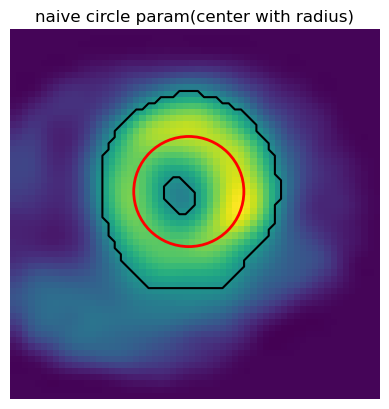

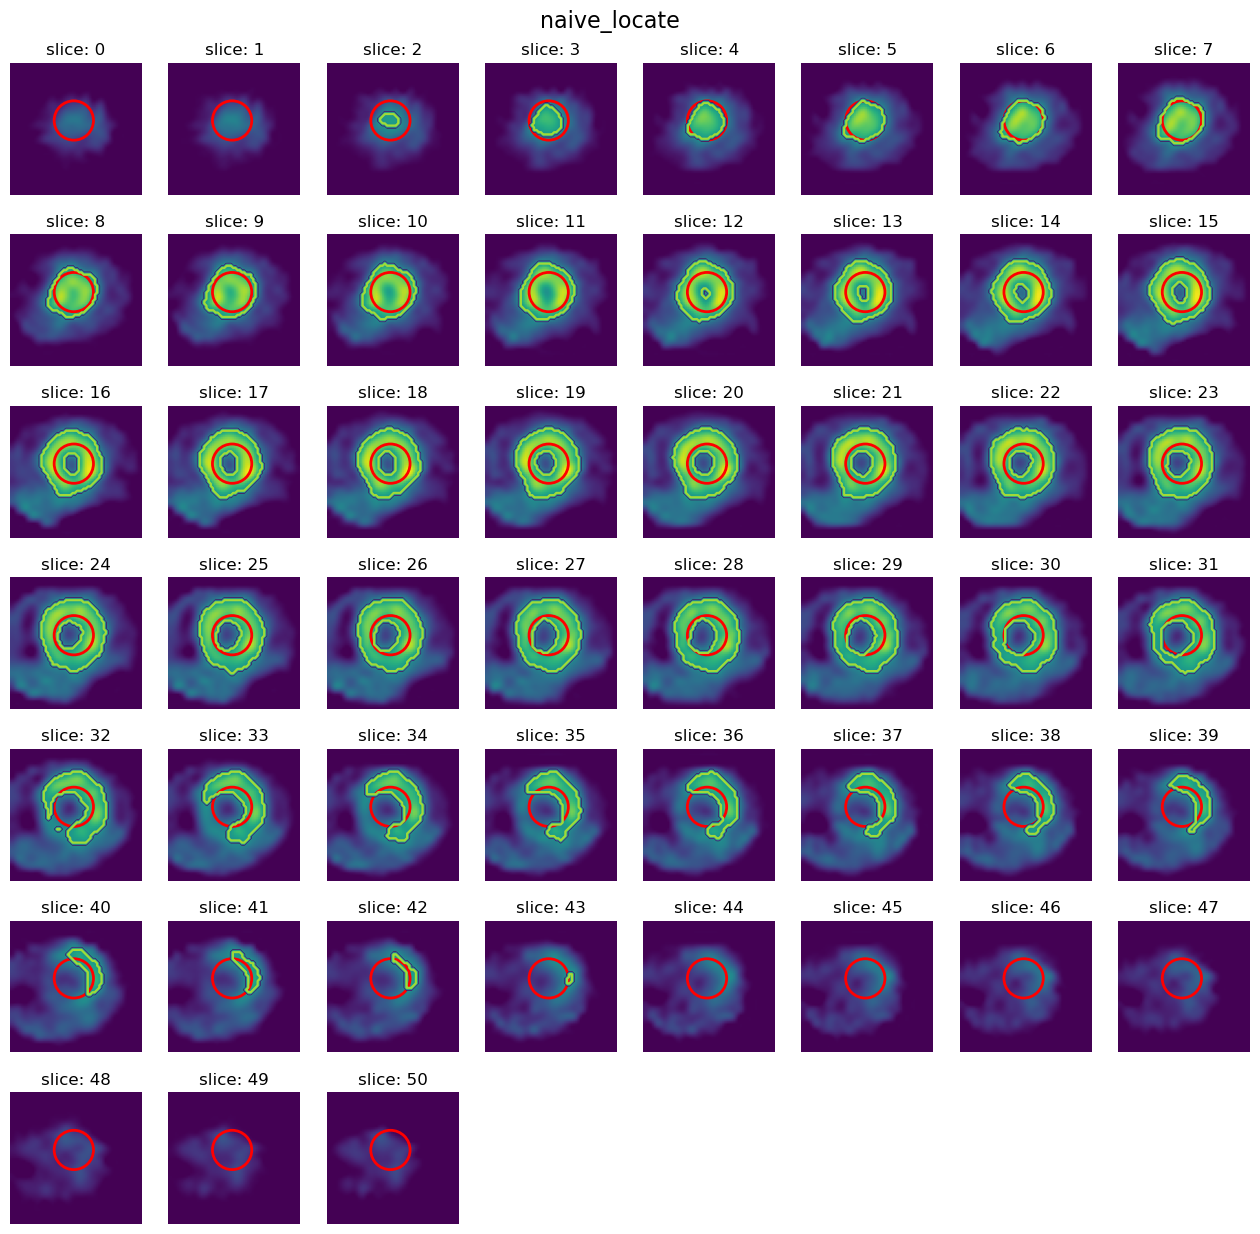

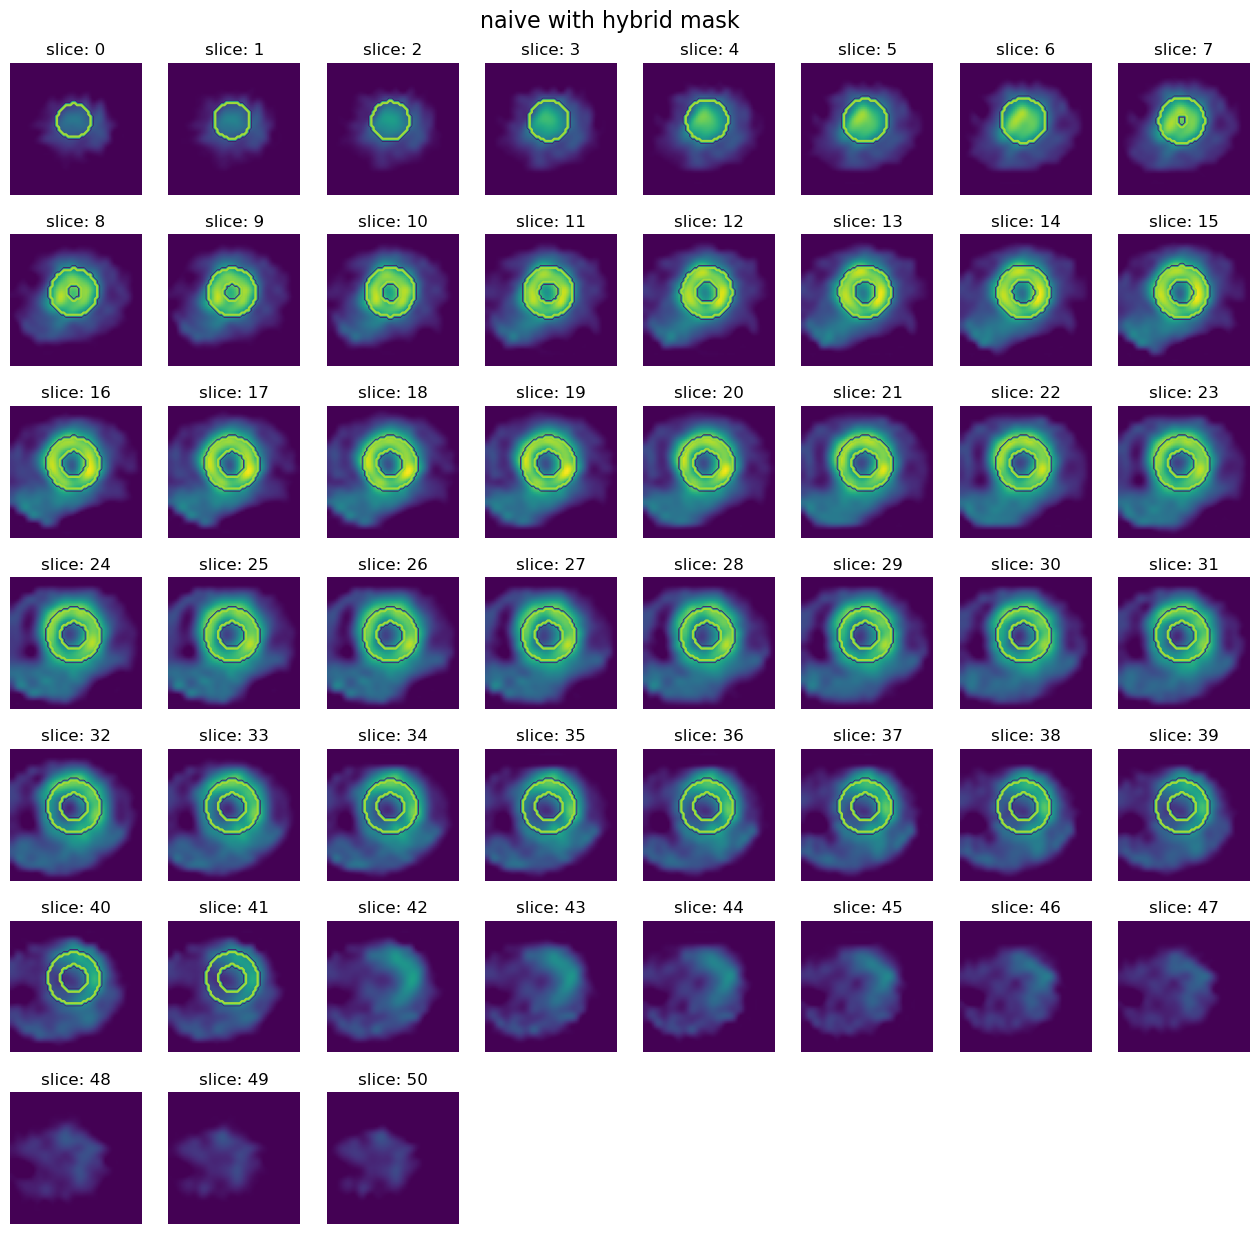

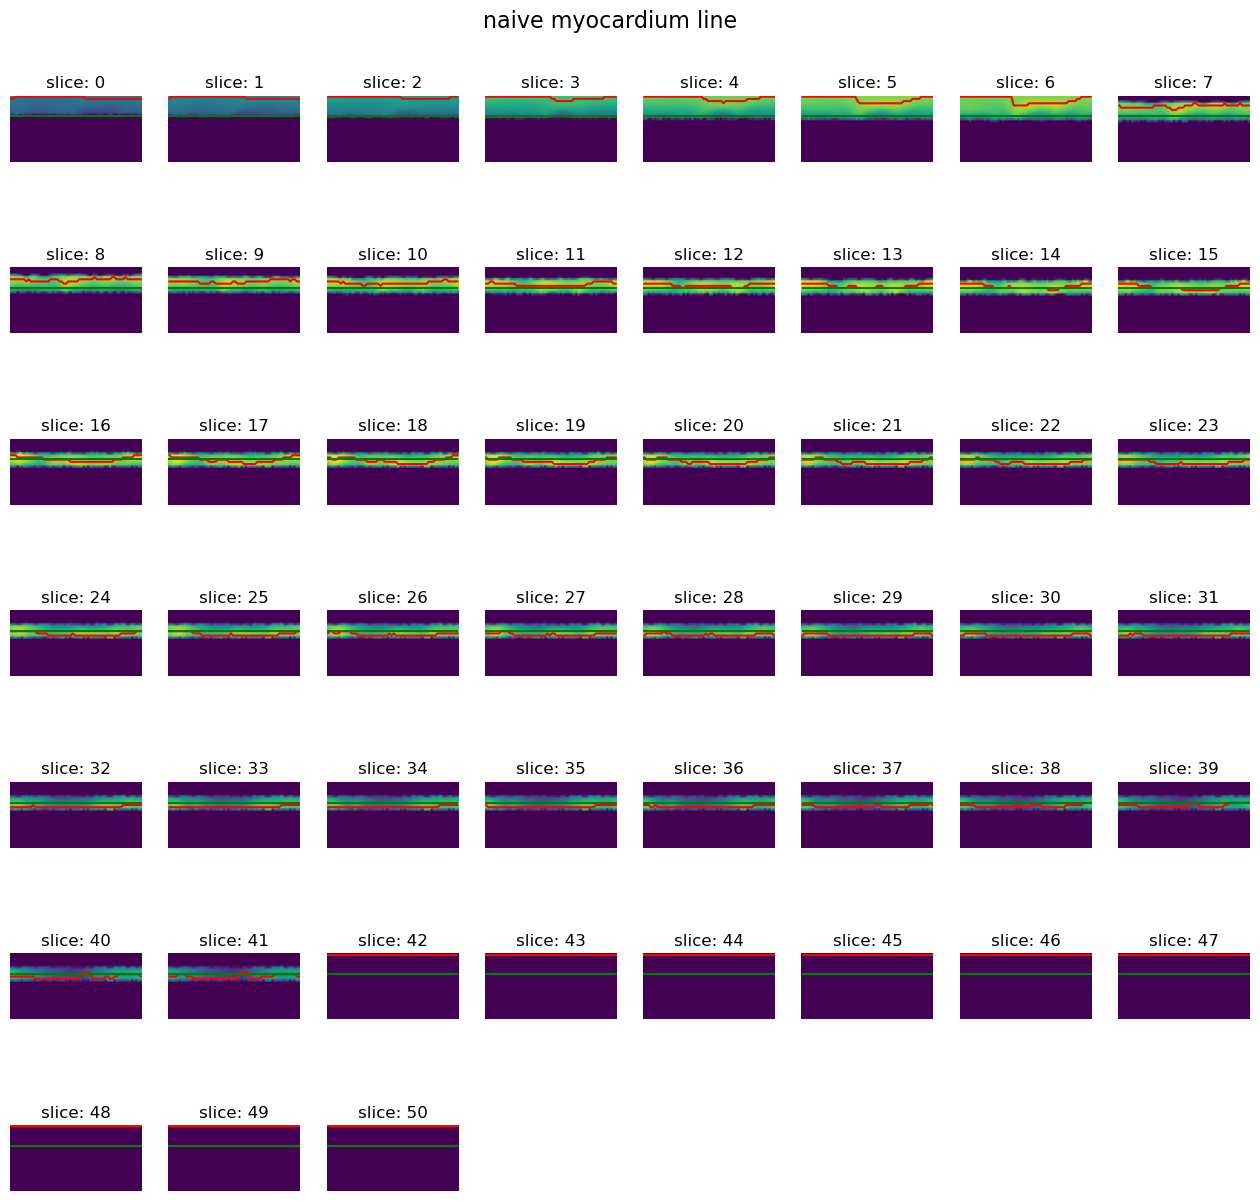

*******************************New param*******************************
True True False False
{
    "center": {
        "cy": 25.48549644709897,
        "cx": 27.931297593199346
    },
    "radius": 10.0,
    "apex_z": 2,
    "base_z": 38,
    "z_map": null,
    "dividing_z": 22.0
}
*******************************New param*******************************
True True True True
{
    "center": {
        "cy": 25.277168242136522,
        "cx": 27.438438120156214
    },
    "radius": 11.0,
    "apex_z": 2,
    "base_z": 37,
    "z_map": null,
    "dividing_z": 24.0
}


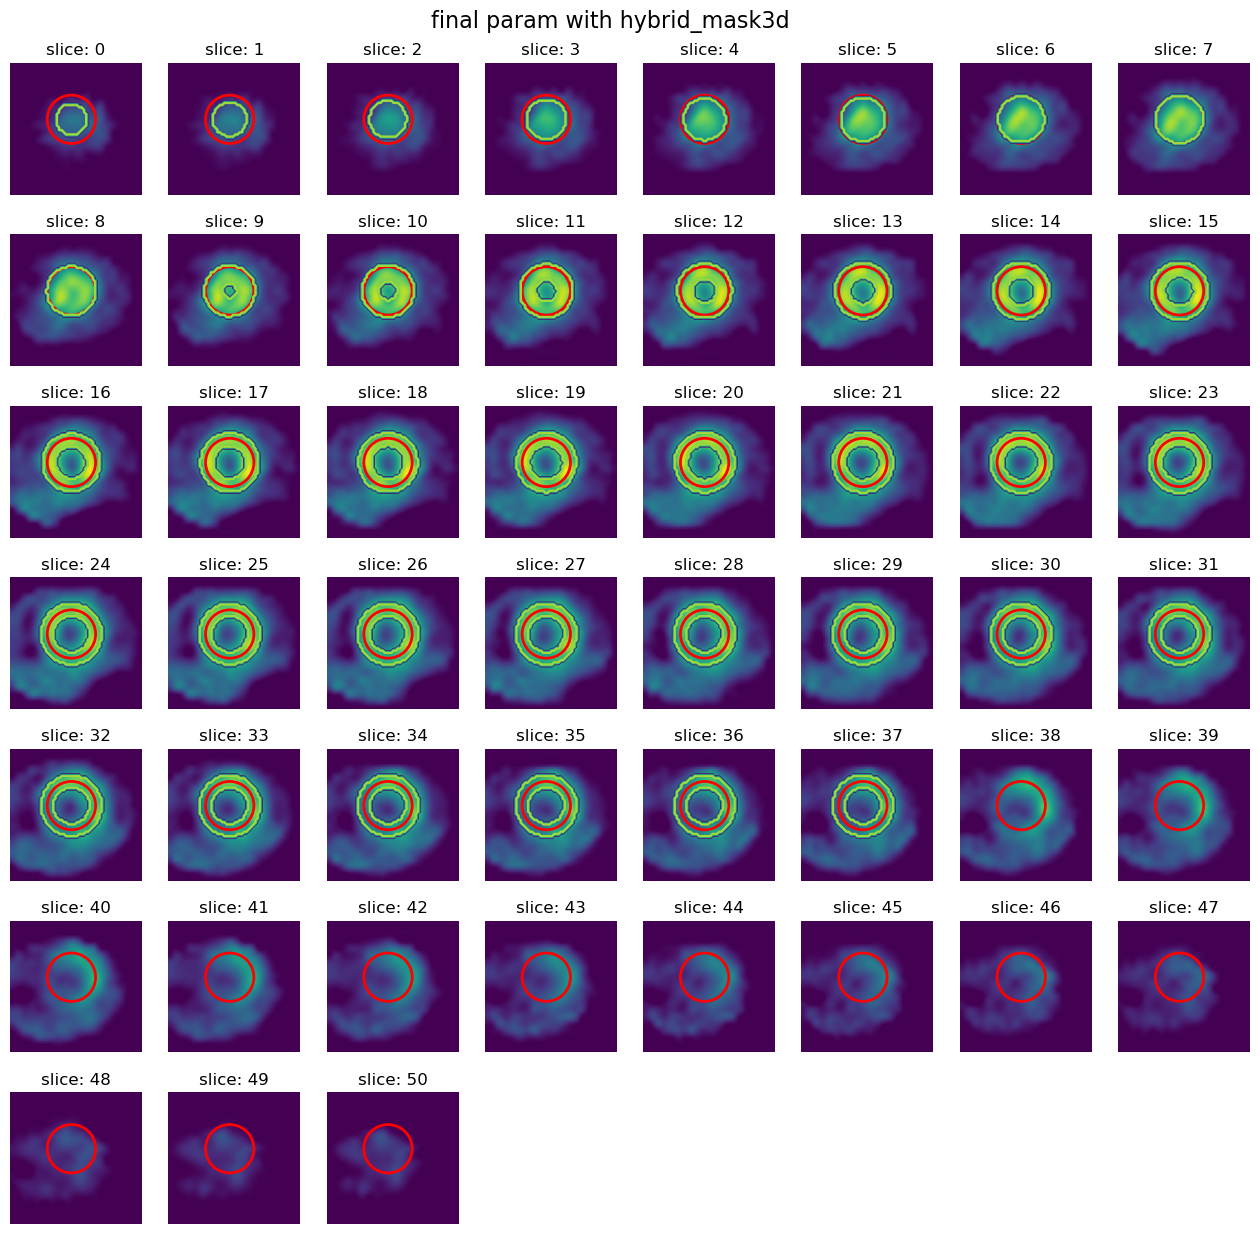

*******************************final_param_with_plane*******************************
{
    "center": {
        "cy": 25.277168242136522,
        "cx": 27.438438120156214
    },
    "radius": 11.0,
    "apex_z": 2,
    "base_z": 37,
    "z_map": null,
    "dividing_z": 24.0,
    "plane": {
        "a": 0,
        "b": 0,
        "c": 0,
        "d": 1
    },
    "angled_plane": {
        "38": [
            0,
            1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
    

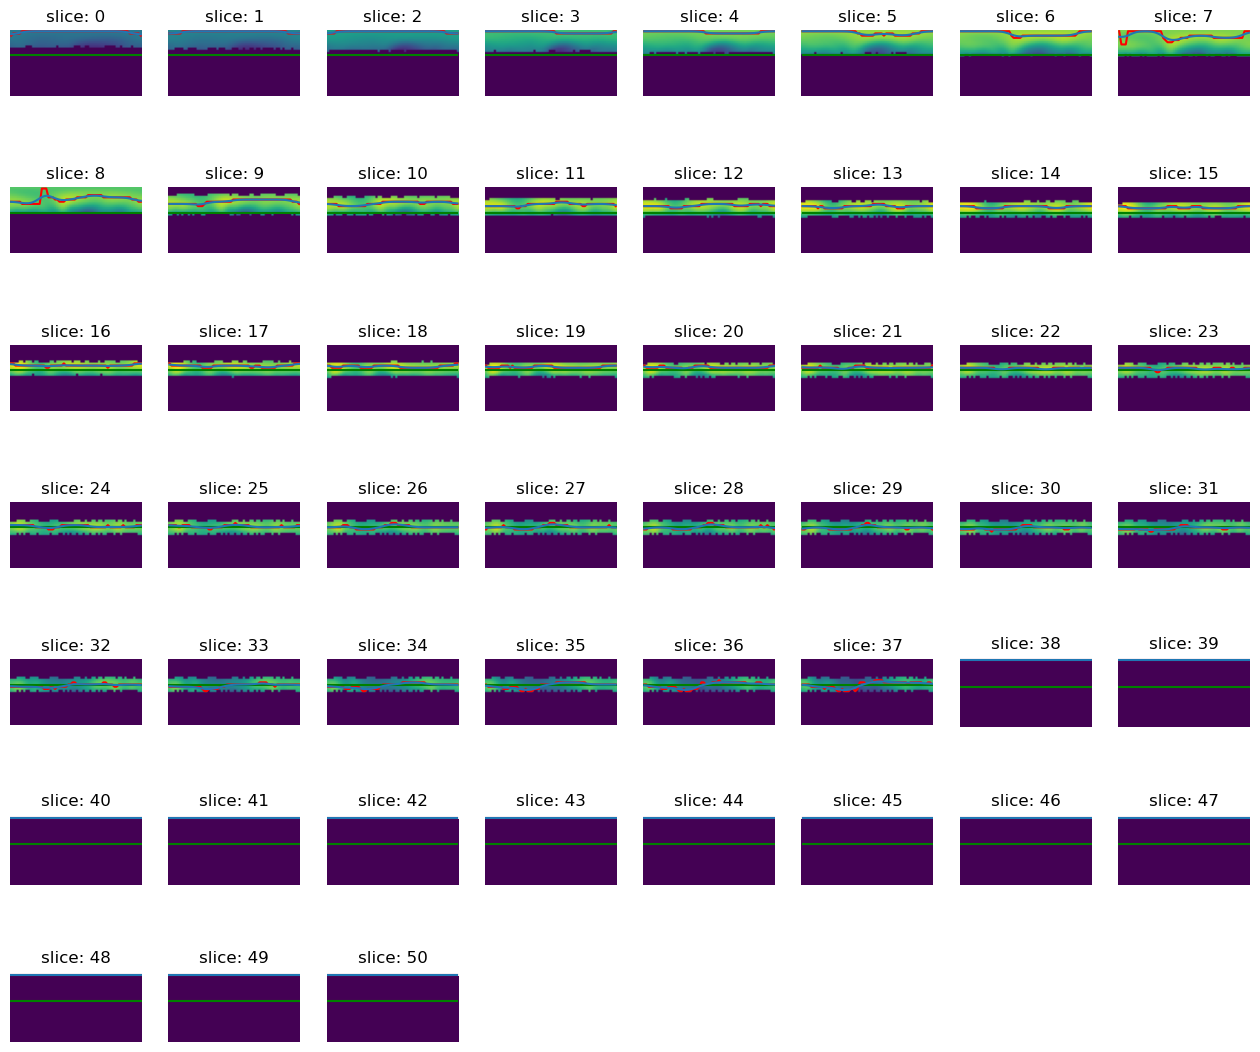

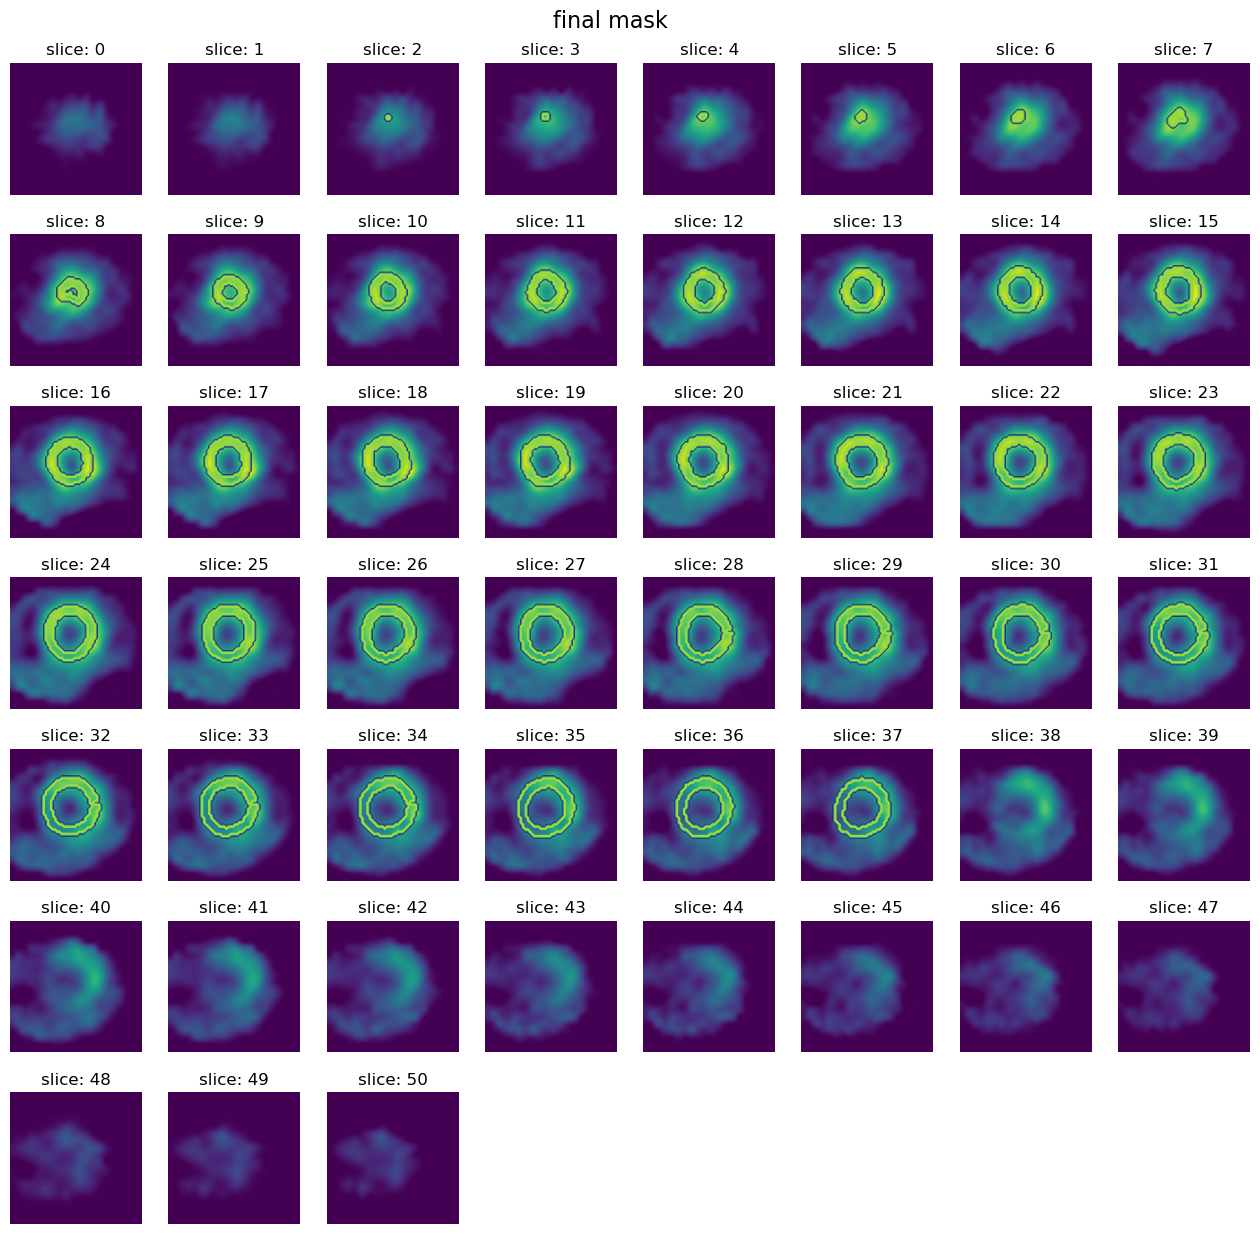

In [2]:
# DATA_COLLECTION = "/mnt/labnas/DataCollection"
DATA_COLLECTION = r"Y:\labspace\DataCollection"
base_dir = os.path.join(DATA_COLLECTION, "Project", "RadiSmart", "cardiac", "healthy")
img_path = os.path.join(base_dir, "000652515", "154")
# img_path = os.path.join(base_dir, "000149118", "101")
# img_path = os.path.join(base_dir, "002475009", "402")
# # img_path = os.path.join(base_dir, "600860468", "997")
# img_path = os.path.join(base_dir, "600360681", "1081")




# base_dir = os.path.join(DATA_COLLECTION, "Project", "RadiSmart", "cardiac", "demo")
# # demo list
# img_path = os.path.join(base_dir, "001398670", "263")


def read_sitk_img(path, zoom_factor = 3):
    sitk_img = sitk.ReadImage(path)
    img_arr = sitk.GetArrayFromImage(sitk_img)
    # SimpleITK: image[x,y,z]; numpy: image_numpy_array[z,y,x]
    # print(f"img meta: \n shape:{img_arr.shape} \n spacing:{sitk_img.GetSpacing()[::-1]}")
    width = 20
    # 计算中心位置
    center = np.array(img_arr.shape)//2
    start = center - width//2
    end = center + width//2
    
    clipped_img_arr = img_arr[:, start[1]:end[1], start[2]:end[2]].copy()
    
    zoomed_clipped_img_arr = zoom(clipped_img_arr, zoom_factor, cval=0)
    voxel_size = np.array(sitk_img.GetSpacing()[::-1])/zoom_factor
    return zoomed_clipped_img_arr, voxel_size

zoom_factor = 3
zoomed_clipped_non_gate_img3d, voxel_size = read_sitk_img(img_path, zoom_factor) 

lv_mask, param = cal_lv_mask(zoomed_clipped_non_gate_img3d, voxel_size, 2)
